# Levich and Koutechy-Levich analysis notebook for CV data.

## 1. Import needed libraries

In [1]:
from pathlib import Path
from ec4py import *
from ec4py import Quantity_Value_Unit as QV

## 2.Make a list of paths to the data files.

In [2]:
paths = []
path_to_dataSetFolder = Path(".").cwd().parent.parent / "test_data" /"CV"
print(path_to_dataSetFolder)
#paths.append( path_to_dataSetFolder / "CV_144913_ 3.tdms")
paths.append( path_to_dataSetFolder / "CV_153559_ 3.tdms")
paths.append( path_to_dataSetFolder / "CV_153541_ 3.tdms")
paths.append( path_to_dataSetFolder / "CV_153333_ 3.tdms")
paths.append( path_to_dataSetFolder / "CV_151300_ 3.tdms")
paths.append( path_to_dataSetFolder / "CV_151725_ 3.tdms")
paths.append( path_to_dataSetFolder / "CV_151512_ 3.tdms")



c:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\test_data\CV


## 3. Load in the data files

(<matplotlib.lines.Line2D at 0x29afd825c50>,
 <Axes: xlabel='Voltage (V)', ylabel='i (A)'>)

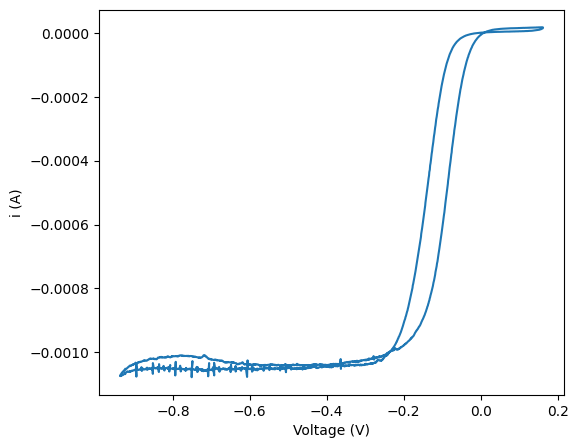

In [3]:
EC_Data(paths[2]).plot("E","i")

In [4]:
CV_Data(paths[2])

CV_Data('CV_153333_ 3.tdms')

In [5]:
CVs = CV_Datas(paths)
for cv in CVs:
    #cv.set_area(0.04532, "cm^2")
    print("aa", cv.area)

aa 1.960e-05 m^2
aa 1.960e-05 m^2
aa 1.960e-05 m^2
aa 1.960e-05 m^2
aa 1.960e-05 m^2
aa 1.960e-05 m^2


(<matplotlib.lines.Line2D at 0x29afd857fd0>,
 <Axes: xlabel='E vs RHE (V)', ylabel='i (A)'>)

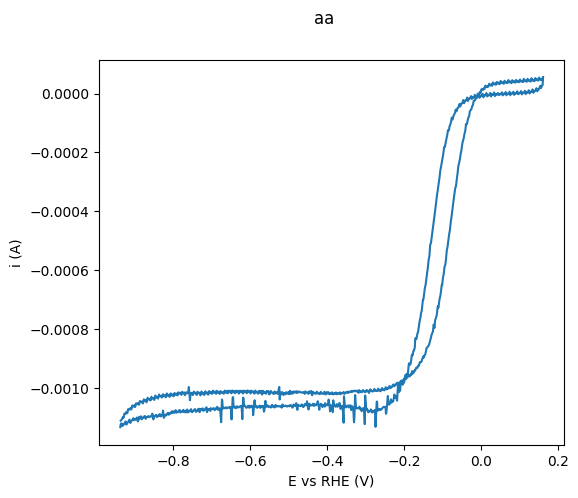

In [6]:
CVs[1].plot(4,title = "aa")

5.000e-01 V s^-1


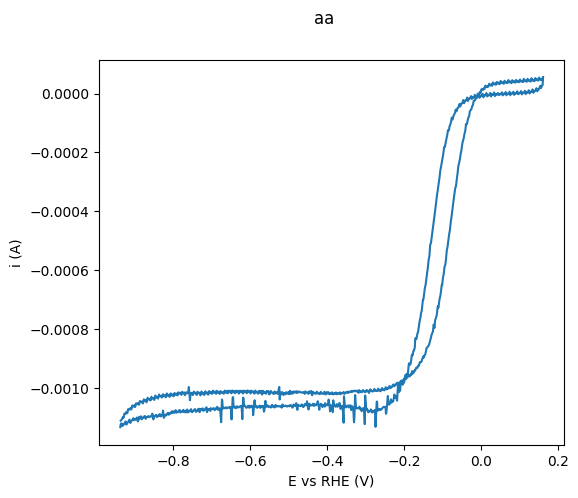

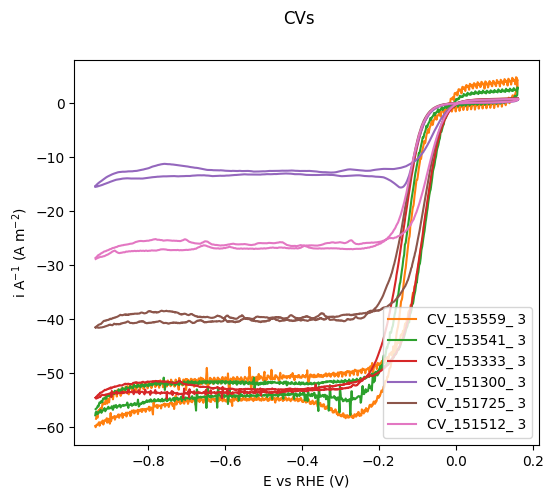

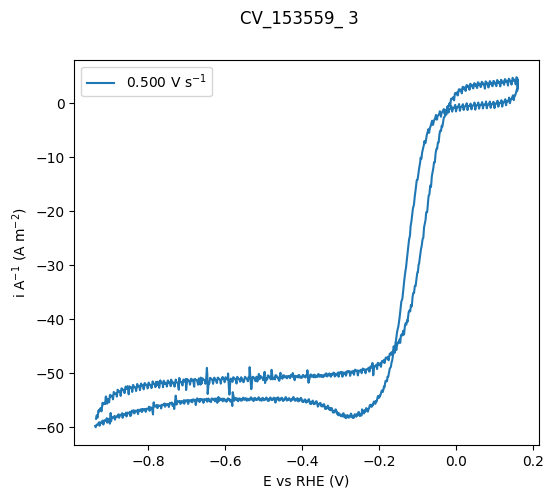

In [7]:
#plot = CVs.plot("" ,legend = "name", smooth_y=50)
CVs[1].plot(title = "aa")
for cv in CVs[:1]:
    print(cv.rate)
    cv2 = cv * (1 / 1000.)
    #cv2.plot()

#CVs.bg_corr(CVs)
CVs.plot(AREA, LEGEND.NAME)
CVs[0].plot(AREA, LEGEND.RATE)
bg_corr = CVs.bg_corr(path_to_dataSetFolder / "CV_144913_ 3.tdms" )

#bg_corr.plot()

## 4. Levich analysis

Levich analysis
dir 	avg     
 :     	A m^-2 rpm^-0.5
slope: 	-1.34e+00


( i$_{+} $+ i$_{-}$)/2 A^-1 w^-0.5 = -1.337e+00 A m^-2 rpm^-0.5

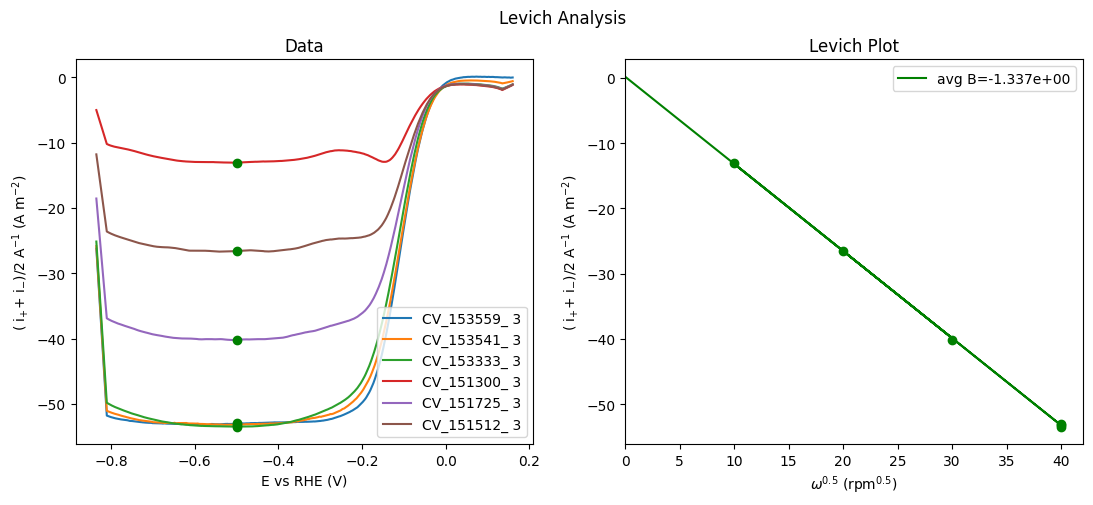

In [8]:
lsvs=CVs.get_sweep(AVG)
lsvs.Levich(-0.5, AREA,y_smooth=50)

(<matplotlib.lines.Line2D at 0x29a834f5c50>,
 <Axes: xlabel='E vs RHE (V)', ylabel='i (A)'>)

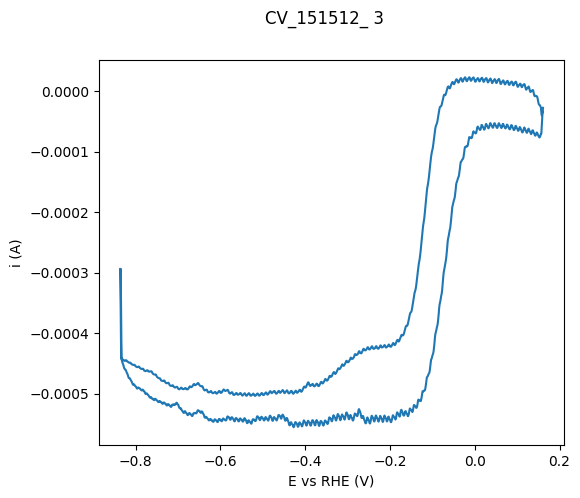

In [9]:
CVs[5].plot(y_smooth=5)


Levich analysis
dir 	pos      	neg     
 :     	A cm^-2 rpm^-0.5 	A cm^-2 rpm^-0.5
slope: 	-1.13e-04 	-1.11e-04


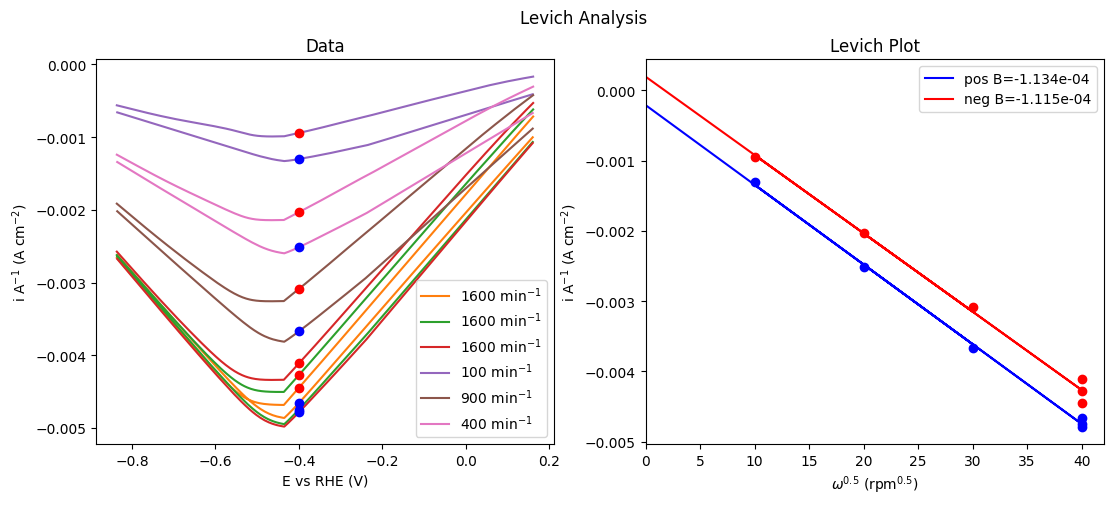

In [10]:
slope1, slope2 = CVs.Levich(-0.4,"area_cm",y_smooth=800)
#use the argument to normalize the data